In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv(r'C:\Users\yaswa\Downloads\cognifyz\Railway_info.csv')
print(data.head(10))
print(data.info())
print(data.describe())


   Train_No    Train_Name           Source_Station_Name  \
0       107  SWV-MAO-VLNK               SAWANTWADI ROAD   
1       108  VLNK-MAO-SWV                   MADGOAN JN.   
2       128  MAO-KOP SPEC                   MADGOAN JN.   
3       290  PALACE ON WH             DELHI-SAFDAR JANG   
4       401  BSB BHARATDA                    AURANGABAD   
5       421  LKO-SVDK FTR                   LUCKNOW JN.   
6       422  SVDK-LKO FTR  SHRI MATA VAISHNO DEVI KATRA   
7       477  FTR TRAIN NO                         SIRSA   
8       502  RJPB-UMB FTR        RAJENDRANAGAR TERMINAL   
9       504  PNBE-BTI FTR                     PATNA JN.   

             Destination_Station_Name       days  
0                         MADGOAN JN.   Saturday  
1                     SAWANTWADI ROAD     Friday  
2  CHHATRAPATI SHAHU MAHARAJ TERMINUS     Friday  
3                   DELHI-SAFDAR JANG  Wednesday  
4                        VARANASI JN.   Saturday  
5        SHRI MATA VAISHNO DEVI KATRA    Tue

In [4]:
# Number of trains
num_trains = len(data)

# Unique source and destination stations
unique_sources = data['Source_Station_Name'].nunique()
unique_destinations = data['Destination_Station_Name'].nunique()

# Most common source and destination stations
common_source = data['Source_Station_Name'].mode()[0]
common_destination = data['Destination_Station_Name'].mode()[0]

print(f"Number of trains: {num_trains}")
print(f"Unique source stations: {unique_sources}")
print(f"Unique destination stations: {unique_destinations}")
print(f"Most common source station: {common_source}")
print(f"Most common destination station: {common_destination}")


Number of trains: 11113
Unique source stations: 921
Unique destination stations: 924
Most common source station: CST-MUMBAI
Most common destination station: CST-MUMBAI


In [6]:
print(data.isnull().sum())

data.fillna("Unknown",inplace=True)

data['Source_Station_Name']=data['Source_Station_Name'].str.upper()
data['Destination_Station_Name']=data['Destination_Station_Name'].str.upper()


# Replace the incorrect spellings with the correct ones in the 'Day' column
data['days'] = data['days'].replace({
    'Fridayd': 'Friday',
    'Sundayd': 'Sunday',
    'Mondayd': 'Monday',
    'Tuesdayd': 'Tuesday',
    'Wednesdayd': 'Wednesday',
    'Thursdayd': 'Thursday',
    'Saturdayd': 'Saturday'
})


Train_No                    0
Train_Name                  0
Source_Station_Name         0
Destination_Station_Name    0
days                        0
dtype: int64


In [8]:
# Filter trains on Saturdays
saturday_trains=data[data['days'].str.contains('Saturday',na=False)]

# Extracting trains starting from a specific station
specific_station="CST-MUMBAI"
trains_from_station=data[data['Destination_Station_Name']==specific_station.upper()]


In [60]:
# Group by source station and count trains
trains_per_station=data.groupby('Destination_Station_Name').size()

# Calculate average trains per day per source station
data['Days Count']=data['days'].apply(lambda x:len(x.split(','))if pd.notna(x)else 0)
avg_trains_per_day=data.groupby('Destination_Station_Name')['Days Count'].mean()


In [12]:
# Categorize trains based on operating days
def categorize_days(days):
    if pd.isnull(days):
        return "Unknown"
    elif "Saturday" in days or "Sunday" in days:
        return "Weekend"
    else:
        return "Weekday"
data['Day Category'] = data['days'].apply(categorize_days)

In [19]:
import numpy as np
np.bool = bool
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

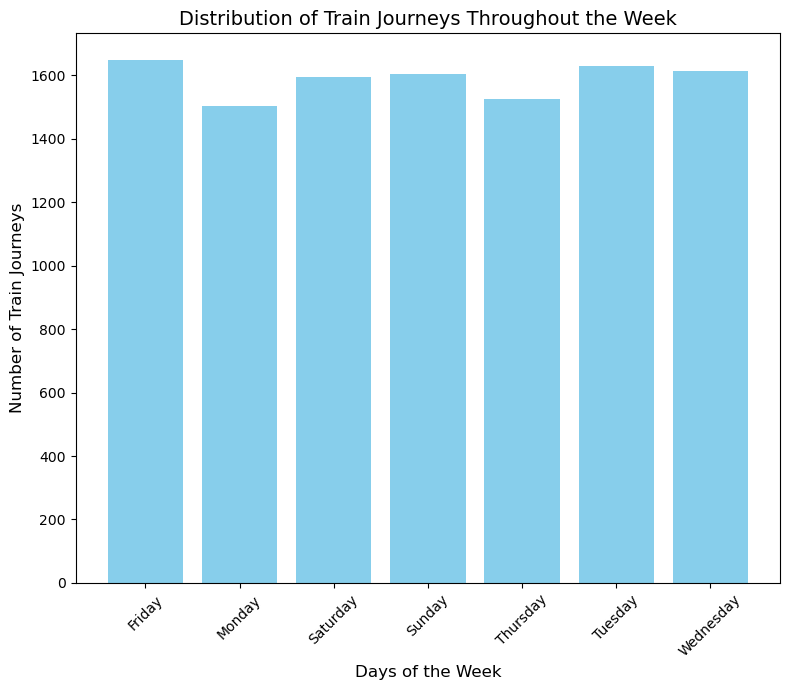

Train counts by day of the week:
Friday       1649
Monday       1503
Saturday     1593
Sunday       1602
Thursday     1526
Tuesday      1628
Wednesday    1612
dtype: int64


In [68]:
if 'days' in data.columns:
    day_counts = data['days'].str.get_dummies(sep=',').sum()
    plt.figure(figsize=(8, 7))
    plt.bar(day_counts.index, day_counts.values, color='skyblue')
    plt.title("Distribution of Train Journeys Throughout the Week", fontsize=14)
    plt.xlabel("Days of the Week", fontsize=12)
    plt.ylabel("Number of Train Journeys", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("Train counts by day of the week:")
    print(day_counts)
else:
    print("'Operating Days' column not found in the dataset.")


In [16]:
# Analyzing trends based on Source and Destination Stations
if 'Source_Station_Name' in data.columns and 'Destination_Station_Name' in data.columns:
    station_trends = data.groupby(['Source_Station_Name', 'Destination_Station_Name']).size().reset_index(name='Days Count')
    
    # Displaying top 10 routes
    top_routes = station_trends.sort_values(by='Days Count', ascending=False).head(10)
    print("Top 10 Train Routes:")
    print(top_routes)
else:
    print("'Source_Station_Name' or 'Destination_Station_Name' column not found in the dataset.")


Top 10 Train Routes:
     Source_Station_Name Destination_Station_Name  Days Count
4400            TAMBARAM            CHENNAI BEACH         137
928        CHENNAI BEACH                 TAMBARAM         137
1127          CST-MUMBAI                   PANVEL          94
3490              PANVEL               CST-MUMBAI          93
1129          CST-MUMBAI                 RAVLI JN          90
3892            RAVLI JN               CST-MUMBAI          90
4716          VELACHEERY            CHENNAI BEACH          89
932        CHENNAI BEACH               VELACHEERY          87
1132          CST-MUMBAI                    THANE          77
4443               THANE               CST-MUMBAI          72


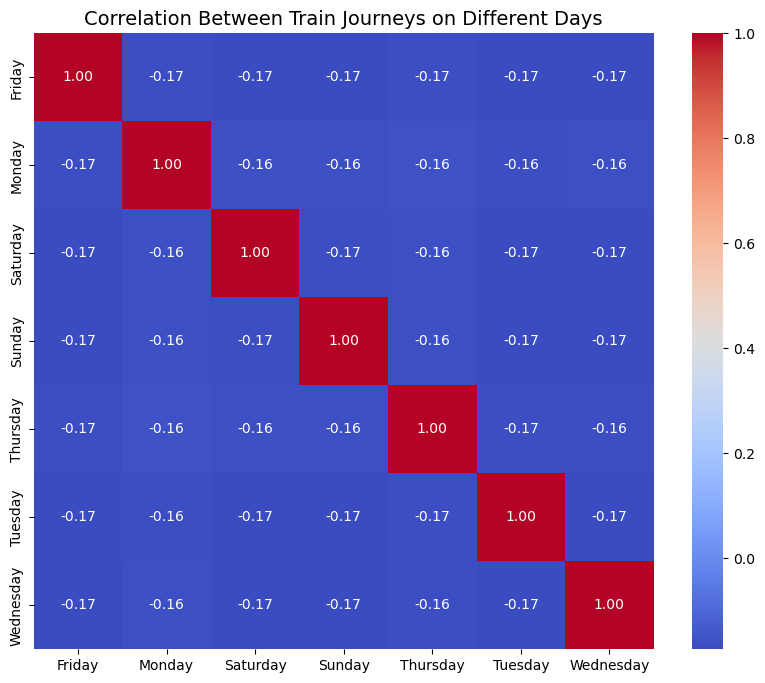

In [20]:
if 'days' in data.columns:
    day_matrix = data['days'].str.get_dummies(sep=',')
    correlation = day_matrix.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Between Train Journeys on Different Days", fontsize=14)
    plt.show()
else:
    print("'Operating Days' column not found in the dataset.")



Top 10 Routes:
     Source_Station_Name Destination_Station_Name  Count
4400            TAMBARAM            CHENNAI BEACH    137
928        CHENNAI BEACH                 TAMBARAM    137
1127          CST-MUMBAI                   PANVEL     94
3490              PANVEL               CST-MUMBAI     93
1129          CST-MUMBAI                 RAVLI JN     90
3892            RAVLI JN               CST-MUMBAI     90
4716          VELACHEERY            CHENNAI BEACH     89
932        CHENNAI BEACH               VELACHEERY     87
1132          CST-MUMBAI                    THANE     77
4443               THANE               CST-MUMBAI     72


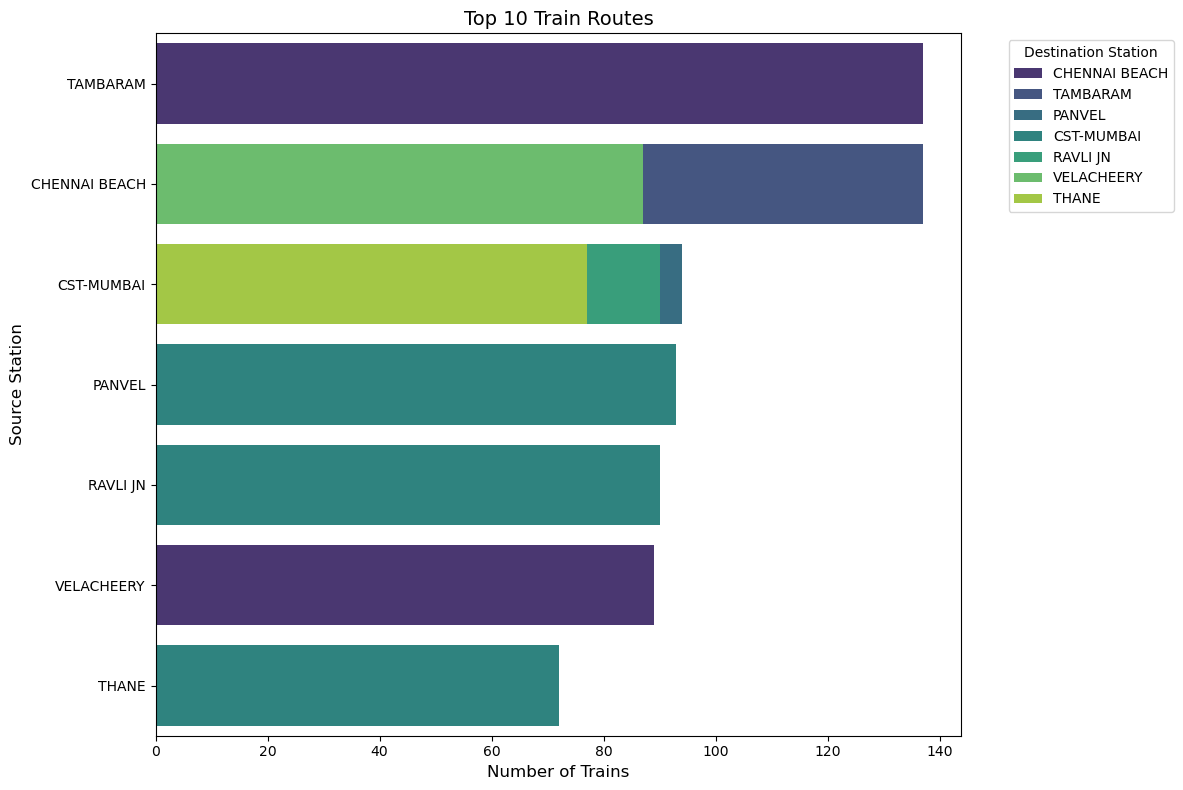

In [56]:
if 'Source_Station_Name' in data.columns and 'Destination_Station_Name' in data.columns:
    station_trends = data.groupby(['Source_Station_Name', 'Destination_Station_Name']).size().reset_index(name='Count')
    
    # Getting the top 10 routes
    top_routes = station_trends.sort_values(by='Count', ascending=False).head(10)
    print("\nTop 10 Routes:")
    print(top_routes)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(
        x='Count', 
        y='Source_Station_Name', 
        hue='Destination_Station_Name', 
        data=top_routes, 
        dodge=False, 
        palette='viridis'
    )
    plt.title("Top 10 Train Routes", fontsize=14)
    plt.xlabel("Number of Trains", fontsize=12)
    plt.ylabel("Source Station", fontsize=12)
    plt.legend(title="Destination Station", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("'Source Station' or 'Destination Station' column not found.")
